# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os


from collections import Counter

In [2]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')

In [3]:
data.columns
data.shape

(109248, 9)

In [4]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [5]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
import numpy as np



In [6]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [8]:
feature_names_bow=[]
feature_names_tfidf=[]

## bow of essay

In [9]:
bow_essay_vectorizer = CountVectorizer(min_df=10)
bow_essay_vectorizer.fit(X_train['essay'])

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow=bow_essay_vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow=bow_essay_vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow=bow_essay_vectorizer.transform(X_test['essay'].values)


print("Shape of matrix after one hot encodig ",X_train_essay_bow.shape)
print("Shape of matrix after one hot encodig ",X_test_essay_bow.shape)
feature_names_bow.extend(bow_essay_vectorizer.get_feature_names())



Shape of matrix after one hot encodig  (49041, 12176)
Shape of matrix after one hot encodig  (36052, 12176)


In [10]:
print("Shape of matrix after one hot encodig ",X_cv_essay_bow.shape)

Shape of matrix after one hot encodig  (24155, 12176)


## tfidf of essay

In [11]:
tfidf_essay_vectorizer = TfidfVectorizer(min_df=10)
tfidf_essay_vectorizer.fit(X_train['essay'])

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf=tfidf_essay_vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfidf=tfidf_essay_vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf=tfidf_essay_vectorizer.transform(X_test['essay'].values)


print("Shape of matrix after one hot encodig ",X_train_essay_tfidf.shape)
print("Shape of matrix after one hot encodig ",X_cv_essay_tfidf.shape)
print("Shape of matrix after one hot encodig ",X_test_essay_tfidf.shape)

feature_names_tfidf.extend(tfidf_essay_vectorizer.get_feature_names())

Shape of matrix after one hot encodig  (49041, 12176)
Shape of matrix after one hot encodig  (24155, 12176)
Shape of matrix after one hot encodig  (36052, 12176)


## one hot encoding and normalizing of categorical and numerical data

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_clean_categories = CountVectorizer(lowercase=False, binary=True)
vectorizer_clean_categories.fit(X_train['clean_categories'].values)
feature_names_bow=[]
feature_names_tfidf=[]
# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_categories=vectorizer_clean_categories.transform(X_train['clean_categories'].values)
X_cv_clean_categories=vectorizer_clean_categories.transform(X_cv['clean_categories'].values)
X_test_clean_categories=vectorizer_clean_categories.transform(X_test['clean_categories'].values)


print(vectorizer_clean_categories.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_clean_categories.shape)
print("Shape of matrix after one hot encodig ",X_cv_clean_categories.shape)
print("Shape of matrix after one hot encodig ",X_test_clean_categories.shape)
feature_names_bow.extend(vectorizer_clean_categories.get_feature_names())
feature_names_tfidf.extend(vectorizer_clean_categories.get_feature_names())

['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
Shape of matrix after one hot encodig  (49041, 9)
Shape of matrix after one hot encodig  (24155, 9)
Shape of matrix after one hot encodig  (36052, 9)


In [15]:

vectorizer_clean_subcategories = CountVectorizer(lowercase=False, binary=True)
vectorizer_clean_subcategories.fit(X_train['clean_subcategories'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_sub_categories=vectorizer_clean_subcategories.transform(X_train['clean_subcategories'].values)
X_cv_clean_sub_categories=vectorizer_clean_subcategories.transform(X_cv['clean_subcategories'].values)
X_test_clean_sub_categories=vectorizer_clean_subcategories.transform(X_test['clean_subcategories'].values)


print(vectorizer_clean_subcategories.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_clean_sub_categories.shape)
print("Shape of matrix after one hot encodig ",X_cv_clean_sub_categories.shape)
print("Shape of matrix after one hot encodig ",X_test_clean_sub_categories.shape)
feature_names_bow.extend(vectorizer_clean_subcategories.get_feature_names())
feature_names_tfidf.extend(vectorizer_clean_subcategories.get_feature_names())

['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
Shape of matrix after one hot encodig  (49041, 30)
Shape of matrix after one hot encodig  (24155, 30)
Shape of matrix after one hot encodig  (36052, 30)


In [16]:

vectorizer_school_state = CountVectorizer(lowercase=False, binary=True)
vectorizer_school_state.fit(X_train['school_state'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_skl_state=vectorizer_school_state.transform(X_train['school_state'].values)
X_cv_skl_state=vectorizer_school_state.transform(X_cv['school_state'].values)
X_test_skl_state=vectorizer_school_state.transform(X_test['school_state'].values)


print(vectorizer_school_state.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_skl_state.shape)
print("Shape of matrix after one hot encodig ",X_cv_skl_state.shape)
print("Shape of matrix after one hot encodig ",X_test_skl_state.shape)
feature_names_bow.extend(vectorizer_school_state.get_feature_names())
feature_names_tfidf.extend(vectorizer_school_state.get_feature_names())

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Shape of matrix after one hot encodig  (49041, 51)
Shape of matrix after one hot encodig  (24155, 51)
Shape of matrix after one hot encodig  (36052, 51)


In [17]:

vectorizer_teacher_prefix = CountVectorizer(lowercase=False, binary=True)
vectorizer_teacher_prefix.fit(X_train['teacher_prefix'].values.astype("U"))

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_prefix=vectorizer_teacher_prefix.transform(X_train['teacher_prefix'].values.astype("U"))
X_cv_teacher_prefix=vectorizer_teacher_prefix.transform(X_cv['teacher_prefix'].values.astype("U"))
X_test_teacher_prefix=vectorizer_teacher_prefix.transform(X_test['teacher_prefix'].values.astype("U"))


print(vectorizer_teacher_prefix.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_teacher_prefix.shape)
print("Shape of matrix after one hot encodig ",X_cv_teacher_prefix.shape)
print("Shape of matrix after one hot encodig ",X_test_teacher_prefix.shape)
feature_names_bow.extend(vectorizer_teacher_prefix.get_feature_names())
feature_names_tfidf.extend(vectorizer_teacher_prefix.get_feature_names())

['dr', 'mr', 'mrs', 'ms', 'teacher']
Shape of matrix after one hot encodig  (49041, 5)
Shape of matrix after one hot encodig  (24155, 5)
Shape of matrix after one hot encodig  (36052, 5)


In [18]:
vectorizer_project_grade_category = CountVectorizer(lowercase=False, binary=True)
vectorizer_project_grade_category.fit(X_train['project_grade_category'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_level=vectorizer_project_grade_category.transform(X_train['project_grade_category'].values)
X_cv_grade_level=vectorizer_project_grade_category.transform(X_cv['project_grade_category'].values)
X_test_grade_level=vectorizer_project_grade_category.transform(X_test['project_grade_category'].values)


print(vectorizer_project_grade_category.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_grade_level.shape)
print("Shape of matrix after one hot encodig ",X_cv_grade_level.shape)
print("Shape of matrix after one hot encodig ",X_test_grade_level.shape)
feature_names_bow.extend(vectorizer_project_grade_category.get_feature_names())
feature_names_tfidf.extend(vectorizer_project_grade_category.get_feature_names())

['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
Shape of matrix after one hot encodig  (49041, 4)
Shape of matrix after one hot encodig  (24155, 4)
Shape of matrix after one hot encodig  (36052, 4)


In [19]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_standardized = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_standardized = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_standardized = normalizer.transform(X_test['price'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_price_standardized.shape, y_train.shape)
print(X_cv_price_standardized.shape, y_cv.shape)
print(X_test_price_standardized.shape, y_test.shape)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


In [20]:
X_train_price_standardized = X_train_price_standardized.reshape(-1,1)
X_cv_price_standardized = X_cv['price'].values.reshape(-1,1)
X_test_price_standardized = X_test_price_standardized.reshape(-1,1)

In [21]:

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_prev_proj = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_prev_proj = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_proj = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_prev_proj.shape, y_train.shape)
print(X_cv_prev_proj.shape, y_cv.shape)
print(X_test_proj.shape, y_test.shape)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


In [22]:

X_train_prev_proj = X_train_prev_proj.reshape(-1,1)
X_cv_prev_proj = X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
X_test_proj = X_test_proj.reshape(-1,1)

## merge bow

In [23]:
from scipy.sparse import hstack

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train_bow = hstack((X_train_clean_categories, X_train_clean_sub_categories,X_train_skl_state,X_train_teacher_prefix,
            X_train_grade_level,X_train_prev_proj,X_train_price_standardized,
            X_train_essay_bow
            )).tocsr()

X_cv_bow = hstack((X_cv_clean_categories, X_cv_clean_sub_categories,X_cv_skl_state,X_cv_teacher_prefix,
            X_cv_grade_level,X_cv_prev_proj,X_cv_price_standardized,
            X_cv_essay_bow
            )).tocsr()

X_test_bow = hstack((X_test_clean_categories, X_test_clean_sub_categories,X_test_skl_state,X_test_teacher_prefix,
            X_test_grade_level,X_test_proj,X_test_price_standardized,
            X_test_essay_bow
            )).tocsr()





print(X_train_bow.shape)
print(X_cv_bow.shape)
print(X_test_bow.shape)

(49041, 12277)
(24155, 12277)
(36052, 12277)


## merge tfidf

In [24]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train_tfidf = hstack((X_train_clean_categories, X_train_clean_sub_categories,X_train_skl_state,X_train_teacher_prefix,
            X_train_grade_level,X_train_prev_proj,X_train_price_standardized,
            X_train_essay_tfidf
            )).tocsr()

X_cv_tfidf = hstack((X_cv_clean_categories, X_cv_clean_sub_categories,X_cv_skl_state,X_cv_teacher_prefix,
            X_cv_grade_level,X_cv_prev_proj,X_cv_price_standardized,
            X_cv_essay_tfidf
            )).tocsr()

X_test_tfidf = hstack((X_test_clean_categories, X_test_clean_sub_categories,X_test_skl_state,X_test_teacher_prefix,
            X_test_grade_level,X_test_proj,X_test_price_standardized,
            X_test_essay_tfidf
            )).tocsr()





print(X_train_bow.shape)
print(X_cv_bow.shape)
print(X_test_bow.shape)

(49041, 12277)
(24155, 12277)
(36052, 12277)


## apply naive bayes on bow

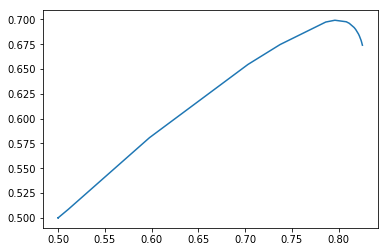

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(class_prior=[0.5,0.5])

parameters = {'alpha':[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]}

clf = GridSearchCV(nb, parameters, cv= 10, scoring='roc_auc',return_train_score=True)

clf.fit(X_train_bow, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
test_auc = clf.cv_results_['mean_test_score'] 
test_auc_std = clf.cv_results_['std_test_score']
plt.plot(train_auc,test_auc)
plt.show()

## Gridsearch hyperparameter tuning

In [26]:
#Output of GridSearchCV
print('Best score: ',clf.best_score_)
print('parameter value with best score: ',clf.best_params_)
print('Train AUC scores')
print(clf.cv_results_['mean_train_score'])
print('CV AUC scores')
print(clf.cv_results_['mean_test_score'])

Best score:  0.699126174818557
parameter value with best score:  {'alpha': 0.5}
Train AUC scores
[0.82551071 0.82453779 0.82398095 0.82225726 0.82128641 0.81832476
 0.81665678 0.81141549 0.80825202 0.796086   0.78630743 0.7374272
 0.70313568 0.59775327 0.51100459 0.50005532 0.5        0.5
 0.50005532 0.50004501]
CV AUC scores
[0.67398328 0.67746919 0.67914759 0.68334092 0.68528564 0.68983848
 0.69180399 0.69606457 0.69759251 0.69912617 0.6973239  0.67461645
 0.65460986 0.58079892 0.50867716 0.50005535 0.5        0.5
 0.50005535 0.50004369]


100%|██████████| 20/20 [00:00<00:00, 20155.23it/s]


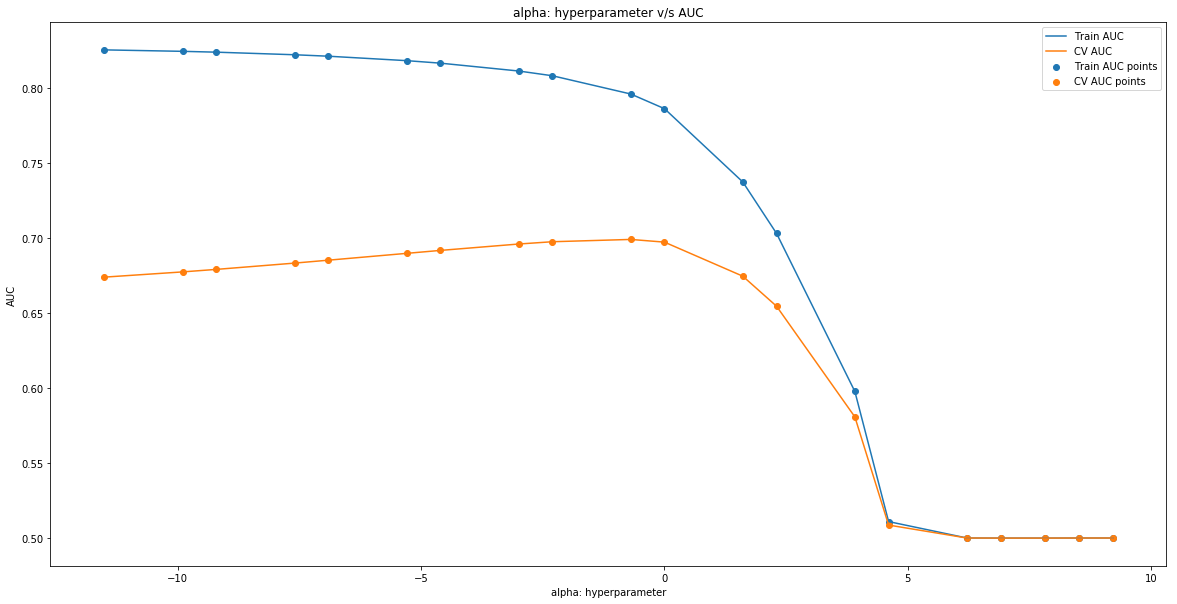

In [27]:
import math

params = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]

log_alphas =[]
for a in tqdm(params):
    b = math.log(a)
    log_alphas.append(b)
    
plt.figure(figsize=(20,10))

plt.plot(log_alphas, train_auc, label='Train AUC')



plt.plot(log_alphas, test_auc, label='CV AUC')



plt.scatter(log_alphas,train_auc, label='Train AUC points')
plt.scatter(log_alphas, test_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")

plt.show()

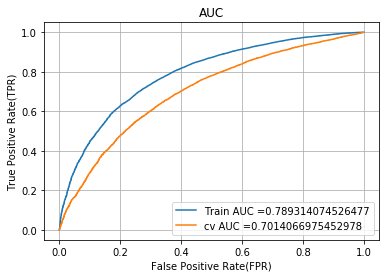

In [28]:

def pred_prob(clf, data): 
    y_pred = []
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred
from sklearn.metrics import roc_curve, auc

nb_bow = MultinomialNB(alpha = clf.best_params_['alpha'],class_prior = [0.5,0.5])

nb_bow.fit(X_train_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = pred_prob(nb_bow,X_train_bow)
y_test_pred = pred_prob(nb_bow,X_test_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="cv AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()


In [29]:
def prediction(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [30]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, prediction(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.2499999818661462 for threshold 0.037


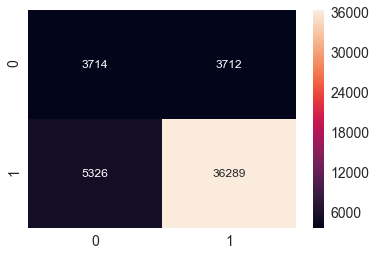

In [31]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 12}, fmt='g')

## to get top 20 features

In [32]:
bow_features_names = []

for feature in vectorizer_clean_categories.get_feature_names() :
    bow_features_names.append(feature)

for feature in vectorizer_clean_subcategories.get_feature_names() :
    bow_features_names.append(feature)

for feature in vectorizer_school_state.get_feature_names() :
    bow_features_names.append(feature)

for feature in vectorizer_project_grade_category.get_feature_names() :
    bow_features_names.append(feature)

for feature in vectorizer_teacher_prefix.get_feature_names() :
    bow_features_names.append(feature)
for feature in bow_essay_vectorizer.get_feature_names() :
    bow_features_names.append(feature)

bow_features_names.append("price")

In [37]:
neg_class_prob_sorted = nb_bow.feature_log_prob_[0, :].argsort()   #class 0
pos_class_prob_sorted = nb_bow.feature_log_prob_[1, :].argsort() #class1

print('Top 20 features from negative class:')
print(np.take(bow_features_names, neg_class_prob_sorted[len(neg_class_prob_sorted)-20:]))

print('Top 20 features from positive class:')
print(np.take(bow_features_names, pos_class_prob_sorted[len(pos_class_prob_sorted )-20:]))

Top 20 features from negative class:
['skip' 'abound' 'reads' 'loved' 'comes' 'workbook' 'neediest' 'weaker'
 'mapping' 'napkins' 'theaters' 'helper' 'thief' 'learner' 'notate'
 'classwork' 'myers' 'learniture' 'schoolers' 'studies']
Top 20 features from positive class:
['days' 'abound' 'loved' 'used' 'reads' 'workbook' 'neediest' 'weaker'
 'napkins' 'mapping' 'helper' 'learner' 'notate' 'thief' 'theaters'
 'classwork' 'learniture' 'myers' 'schoolers' 'studies']


In [34]:
# https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data

from tabulate import tabulate
print(tabulate([['BOW','Brute','0.5',0.70159]], headers=['Vectorizer', 'Model','Hyperparameter','AUC'], tablefmt='orgtbl'))

| Vectorizer   | Model   |   Hyperparameter |     AUC |
|--------------+---------+------------------+---------|
| BOW          | Brute   |              0.5 | 0.70159 |
